# 1. Work Flow


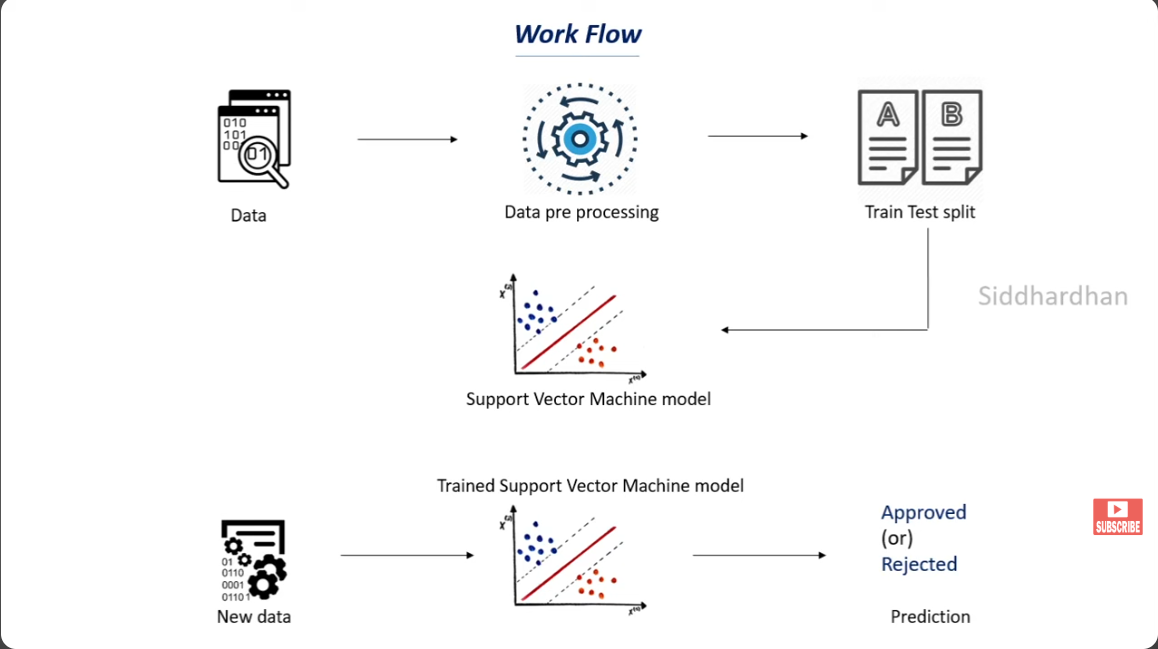

# 2. Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

# 3. Data Collection and Processing

In [2]:
# Loading the data into a pandas dataframe
df = pd.read_csv('LoanStatus.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# checking the first five rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Checking the sahpe of our datset
df.shape

(614, 13)

In [6]:
# Statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Checking for null values
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
# Dropping the missing values
df.dropna(inplace = True)

In [9]:
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [10]:
# Label encoding
df.replace({"Loan_Status":{'N':0,'Y':1}}, inplace = True)

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
# Checking dependents column
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [13]:
# Replacing 3+ to 4
df = df.replace(to_replace='3+', value=4)

In [14]:
# Checking dependents column
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


# 4. Data Visualization

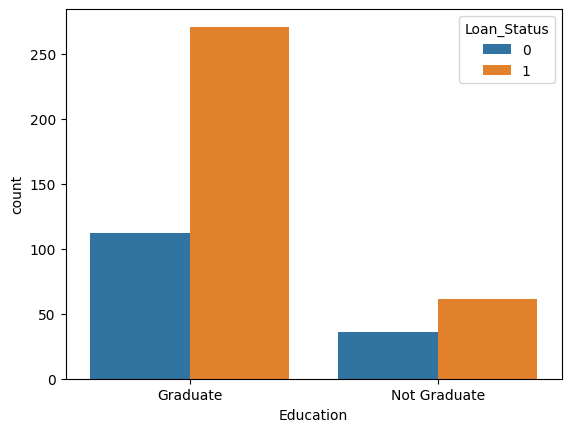

In [15]:
# Education and Loan Ststus
sns.countplot(x = 'Education', hue = 'Loan_Status', data = df);

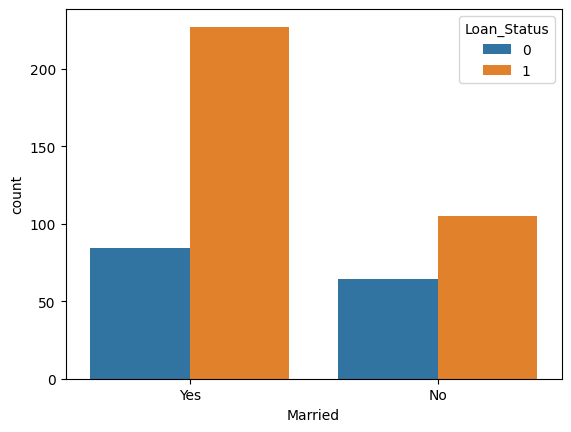

In [16]:
# Married & Loan status
sns.countplot(x = 'Married', hue = 'Loan_Status', data = df);

In [17]:
# Convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
            'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}, 'Education':{'Graduate':1, 'Not Graduate':0}}, inplace = True)

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [19]:
# Separating the data
X = df.drop(columns = ['Loan_ID', 'Loan_Status'], axis = 1)
Y = df['Loan_Status']

In [20]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

# 5. Training and Testing Our Data

In [21]:
# Train, test, split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


# 6. Training the model: Support Vector Machine

In [23]:
# Create an SVM classifier with a linear kernel (best for linearly separable data)
classifier = svm.SVC(kernel='linear')

In [24]:
# Training the support Vector Machine Model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# 7. Model Evaluation

In [26]:
# Accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [29]:
# Printing the accuracy of the model
print(f'Accuracy score of the training data : {training_data_accuracy*100:.2f}%')

Accuracy score of the training data : 79.86%


Now, let's evaluate the model's performance on the test data.

In [30]:
# Accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
# Print the accuracy of the model on the test data
print(f'Accuracy score of the test data: {test_data_accuracy*100:.2f}%')

Accuracy score of the test data: 83.33%


# 8. Making a predictive system


In [37]:
input_data = ('Male','Yes',0,'Not Graduate','No',4887,0,133,360,1,'Rural')

# Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Convert categorical features to numerical
input_data_df = pd.DataFrame(input_data_reshaped, columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'])

input_data_df = input_data_df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
            'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}, 'Education':{'Graduate':1, 'Not Graduate':0}})

input_data_df = input_data_df.replace(to_replace='3+', value=4)
input_data_df['Dependents'] = input_data_df['Dependents'].astype(int)


prediction = classifier.predict(input_data_df)
print(prediction)

if prediction[0] == 0:
    print('The loan is not approved')
else:
    print('The loan is approved')

[1]
The loan is approved
